#Ganesha
Day1  Session 1.1: Python Object Identity, Interning, and Headers
This notebook dives deep into how Python manages object identity, memory, and performance-critical behaviors.
is - fairly tricky operator
Sometimes due to optimizization 2 variables will point to the same memory

In [1]:
#he built-in id() function in Python returns the unique identity of an object
#This is an integer that is guaranteed to be unique and constant for this object during its lifetime.
my_list = [1, 2, 3]
object_id = id(my_list)
print(f"The object ID of my_list is: {object_id}")

my_string = "hello"
object_id_string = id(my_string)
print(f"The object ID of my_string is: {object_id_string}")

#While id() gives you a unique integer identifier, it doesn't directly represent the memory address in a way you might see in languages like C or C++.
#However, the value returned by id() is often related to the object's memory address.
# to get an equivalent of the address
my_dict = {"a": 1, "b": 2}
memory_location = hex(id(my_dict))
print(f"The approximate memory location of my_dict is: {memory_location}")

The object ID of my_list is: 133386841151808
The object ID of my_string is: 133387373503152
The approximate memory location of my_dict is: 0x79508bd771c0


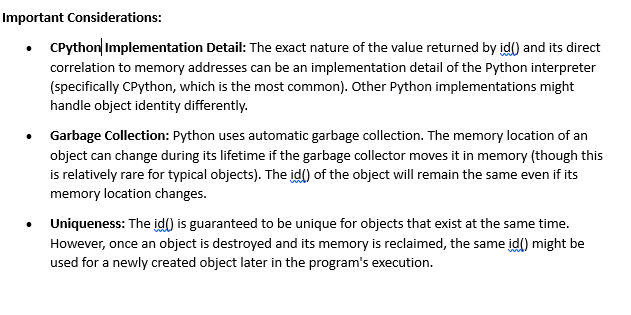


## 1. `id()` vs `is` vs `==`
In Python:
- `==` checks for value equality.
- `is` checks for object identity (i.e., same memory location).
- `id()` returns the unique identity (memory address) of an object.


Object **interning** is a technique used in Python to optimize memory usage and improve* performance by reusing immutable objects *instead of creating new instances. It is particularly useful for strings, integers and user-defined objects. By **interning object**s, Python can store** only one copy of each distinct object in memory reducing memory consumption and speeding up operations that rely on object comparisons**

Let's demonstrate with simple examples:

In [5]:
a = 256
b = 256
print("a is b:", a is b)       # True because of integer interning
print("id(a):", id(a), "id(b):", id(b))

x = [1, 2]
y = [1, 2]
print("x == y:", x == y)       # True: value equality
print("x is y:", x is y)       # False: different objects
print("id(x):", id(x), "id(y):", id(y))
x.append(3)
print("id(x):", id(x), "id(y):", id(y))
x = (1, 2)
y = (1, 2)
print("x == y:", x == y)       # True: value equality
print("x is y:", x is y)       # False: different objects

r=10
print(id(r))
r=20
print(id(r))
x=20
y=20
print(id(x))
print(id(y))


a is b: True
id(a): 10759016 id(b): 10759016
x == y: True
x is y: False
id(x): 133386290438528 id(y): 133386290102784
id(x): 133386290438528 id(y): 133386290102784
x == y: True
x is y: False
10751144
10751464
10751464
10751464


In [6]:


# User-defined objects are not interned by default.
class MyClass:
    pass
#saying obj1 and obj2 are of type MYclass
obj1 = MyClass()
obj2 = MyClass()

print("obj1 == obj2:", obj1 == obj2)  # False (unless __eq__ is defined)
print("obj1 is obj2:", obj1 is obj2)  # False: different objects
print("id(obj1):", id(obj1), "id(obj2):", id(obj2))


obj1 == obj2: False
obj1 is obj2: False
id(obj1): 133386171011856 id(obj2): 133386174193552


## 2. Interning of Small Integers and Strings
Python automatically interns:
- Small integers (typically from -5 to 256)
- Some short strings used as identifiers

Manual interning can be done using `sys.intern()` to save memory or speed up dictionary lookups.

In [7]:
import sys

s1 = sys.intern('long_string_example_that_repeats')
s2 = sys.intern('long_string_example_that_repeats')
print("s1 is s2:", s1 is s2)  # Interning ensures identity match

# Without interning
s3 = 'long_string_example_that_repeats'*1000
s4 = 'long_string_example_that_repeats'*1000
print("s3 is s4:", s3 is s4)  # May be True or False depending on interning behavior

s1 is s2: True
s3 is s4: False


## 3. Object Headers and Memory Layout
All Python objects carry metadata: reference count, type pointer, etc. The `sys.getsizeof()` function returns the size of the object in bytes (not counting referenced contents for containers).
![image.png](
  
)

In [8]:
import sys

print("Size of int(5):", sys.getsizeof(5))
print("Size of list []:", sys.getsizeof([]))
print("Size of dict {}:", sys.getsizeof({}))
print("Size of 'a':", sys.getsizeof('a'))

Size of int(5): 28
Size of list []: 56
Size of dict {}: 64
Size of 'a': 50


In [ ]:
import sys
import ctypes

def get_ref_count(obj_id):
    """
    Gets the reference count of an object given its object ID.

    Args:
        obj_id: The integer ID of the object (obtained using id()).

    Returns:
        The reference count of the object.  Returns 0 if the object ID is invalid.
    """
    try:
        # Use ctypes to access the PyObject struct's ob_refcnt field.
        # This is CPython-specific.  It's crucial to use a pointer.
        return ctypes.c_long.from_address(obj_id).value
    except ValueError:
        return 0  # Handle invalid object IDs

def show_object_info(obj, var_name="obj"):
    """
    Displays information about a Python object, including its value,
    type, object ID, and reference count.

    Args:
        obj: The Python object.
        var_name: (Optional) The name of the variable holding the object, for display.
    """
    obj_id = id(obj)
    ref_count = get_ref_count(obj_id)
    obj_type = type(obj)
    obj_value = obj  # Directly use the object for display

    print(f"Variable Name: {var_name}")
    print(f"Object Value : {obj_value}")
    print(f"Object Type  : {obj_type}")
    print(f"Object ID    : {obj_id}")
    print(f"Reference Count: {ref_count}")
    print("-" * 40)

    # Line diagram of typical Python object memory layout (Conceptual)
    print("Typical Python Object Memory Layout (Conceptual):")
    print("+-------------------------+")
    print("| Object Header           |")
    print("+-------------------------+")
    print("|   - Reference Count     |  <--- For garbage collection")
    print("|   - Type Pointer        |  <--- Points to the object's type")
    print("+-------------------------+")
    print("| Object Data             |  <--- The actual value(s) the object holds")
    print("+-------------------------+")
    print()



def main():
    """
    Main function to demonstrate object information and reference counting,
    especially for small integers.
    """
    # Demonstrate with a string
    my_string = "Hello"
    show_object_info(my_string, "my_string")

    # Demonstrate with a list
    my_list = [1, 2, 3]
    show_object_info(my_list, "my_list")

    # Demonstrate with an integer
    my_int = 10
    show_object_info(my_int, "my_int")

    # Show how reference counts work, especially for small integers
    a = 256
    b = 256
    c = 257
    d = 257
    print(f"id(a): {id(a)}, refcount(a): {get_ref_count(id(a))}")
    print(f"id(b): {id(b)}, refcount(b): {get_ref_count(id(b))}")
    print(f"id(c): {id(c)}, refcount(c): {get_ref_count(id(c))}")
    print(f"id(d): {id(d)}, refcount(d): {get_ref_count(id(d))}")

    x = 256
    y = x
    z = 256
    print(f"Initial refcount of 256: {get_ref_count(id(x))}")
    y = 256
    print(f"Refcount of 256 after y=256: {get_ref_count(id(x))}")
    del x
    print(f"Refcount of 256 after del x: {get_ref_count(id(y))}")
    del y
    print(f"Refcount of 256 after del y: {get_ref_count(id(z))}")

if __name__ == "__main__":
    main()


## 4. Performance Implications
- Using `is` is faster than `==` for strings if interning is used.
- Interning is especially helpful in dictionary-heavy or loop-intensive code.
- Object creation has memory and GC overhead—reuse when possible.

In [ ]:
import timeit

def compare_strings_is():
    a = "very long string" * 100
    b = "very long string" * 100
    return a is b

def compare_strings_equals():
    a = "very long string" * 100
    b = "very long string" * 100
    return a == b

def compare_lists_is():
    a = [1, 2, 3] * 100
    b = [1, 2, 3] * 100
    return a is b

def compare_lists_equals():
    a = [1, 2, 3] * 100
    b = [1, 2, 3] * 100
    return a == b


if __name__ == "__main__":
    number_of_iterations = 10000

    time_is_strings = timeit.timeit(compare_strings_is, number=number_of_iterations)
    time_equals_strings = timeit.timeit(compare_strings_equals, number=number_of_iterations)
    time_is_lists = timeit.timeit(compare_lists_is, number=number_of_iterations)
    time_equals_lists = timeit.timeit(compare_lists_equals, number=number_of_iterations)

    print(f"Time using 'is' (long strings): {time_is_strings:.6f} seconds")
    print(f"Time using '==' (long strings): {time_equals_strings:.6f} seconds")
    print(f"Time using 'is' (long lists): {time_is_lists:.6f} seconds")
    print(f"Time using '==' (long lists): {time_equals_lists:.6f} seconds")


## Challenge: Optimize Dictionary Lookup with Interning
Given many repeated string keys in a loop-heavy dictionary lookup:
- Profile with and without `sys.intern()`.
- Observe performance and memory impact.

In [ ]:
#do a dictonary look up
import timeit
import random
import string
import sys

def generate_random_string(length):
    return ''.join(random.choice(string.ascii_letters) for _ in range(length))

def time_lookups(data, keys):
    """
    Times the dictionary lookups.
    """
    start_time = timeit.default_timer()
    for key in keys:
        _ = data[key]
    end_time = timeit.default_timer()
    return end_time - start_time

if __name__ == "__main__":
    num_keys = 10000  #  number of unique keys
    string_length = 1000  #  string length
    num_lookups = 100000  #  number of lookups

    # 1. Generate a set of random, potentially duplicate strings.
    unique_strings = [generate_random_string(string_length) for _ in range(num_keys)]

    # 2. Create a list of keys to use for lookups.  Use the *same* strings.
    lookup_keys = unique_strings * (num_lookups // num_keys)

    # 3. Create dictionaries: one with interned keys, one without.
    interned_data = {sys.intern(s): i for i, s in enumerate(unique_strings)}
    regular_data = {s: i for i, s in enumerate(unique_strings)}

    # 4.  Time the lookups.  Importantly, use the *same* lookup keys.
    time_with_interning = time_lookups(interned_data, lookup_keys)
    time_without_interning = time_lookups(regular_data, lookup_keys)

    print(f"Time with interning ({len(lookup_keys)} lookups): {time_with_interning:.6f} seconds")
    print(f"Time without interning ({len(lookup_keys)} lookups): {time_without_interning:.6f} seconds")


In [ ]:
import time
import json
import sys

def load_config(config_data):
    """
    Loads configuration data from a string (e.g., from a file).

    Args:
        config_data: A string containing the configuration data (e.g., JSON).

    Returns:
        A dictionary containing the configuration settings.
    """
    try:
        config = json.loads(config_data)  # Parse the JSON data
        return config
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid configuration data: {e}")

def get_config_value(config, key):
    """
    Retrieves a configuration value given its key.

    Args:
        config: A dictionary containing the configuration settings.
        key: The key of the configuration value to retrieve.

    Returns:
        The configuration value associated with the key, or None if the key is not found.
    """
    return config.get(key)

def process_config(config, num_accesses):
    """
    Simulates accessing configuration values repeatedly.

    Args:
        config: A dictionary containing the configuration settings.
        num_accesses: The number of times to access configuration values.
    """
    start_time = time.time()
    for _ in range(num_accesses):
        #  Access configuration values here.  For the challenge,
        #  you should access the same keys repeatedly to simulate
        #  a real-world scenario where certain configuration
        #  values are accessed more frequently than others.
        #  For example:
        get_config_value(config, "key1") #<--- Replace with your access pattern
        get_config_value(config, "key2")
        get_config_value(config, "key1")
        get_config_value(config, "key3")
        get_config_value(config, "key1")
        get_config_value(config, "key2")
        get_config_value(config, "key4")
        get_config_value(config, "key1")
        get_config_value(config, "key2")
        get_config_value(config, "key3")
        pass # replace this with the repeated access
    end_time = time.time()
    print(f"Time to process config with {num_accesses} accesses: {end_time - start_time:.4f} seconds")

def main():
    """
    Main function to demonstrate configuration loading and access.
    """
    # Sample configuration data (in real-world, this would come from a file)
    config_data = """
    {
        "key1": "value1",
        "key2": "value2",
        "key3": "value3",
        "key4": "value4",
        "key5": "value5",
        "long_key_1": "long_value_1",
        "long_key_2": "long_value_2",
        "long_key_3": "long_value_3",
        "long_key_4": "long_value_4",
        "long_key_5": "long_value_5"
    }
    """

    # Load the configuration data
    config = load_config(config_data)

    # Process the configuration (access values repeatedly)
    num_accesses = 100000  # Simulate a large number of accesses
    process_config(config, num_accesses)

    # Challenge for the User:
    # ----------------------
    # Modify this code to use string interning to optimize the configuration loading and access.
    # Specifically, focus on where and how you would use sys.intern() to improve the performance
    # of the process_config function.  Consider these points:
    #
    # Where to Intern: Which strings should you intern?
    # When to Intern: When is the best time to intern these strings?
    # How to Measure: How can you use timeit or similar techniques to measure the performance
    # improvement (if any) that your interning provides?
    #
    # Add your optimized code below this comment.  You may need to modify the existing functions
    # or add new ones.  Remember to measure the execution time of the original version
    # and your optimized version to demonstrate the performance difference.


if __name__ == "__main__":
    main()


In [ ]:
import timeit
import json
import sys

def load_config(config_data, intern_keys=False):
    """
    Loads configuration data from a string (e.g., from a file).  Optionally interns the keys.

    Args:
        config_data: A string containing the configuration data (e.g., JSON).
        intern_keys:  A boolean indicating whether to intern the keys.

    Returns:
        A dictionary containing the configuration settings.
    """
    try:
        config = json.loads(config_data)  # Parse the JSON data
        if intern_keys:
            interned_config = {}
            for key, value in config.items():
                interned_config[sys.intern(key)] = value
            return interned_config
        return config
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid configuration data: {e}")



def get_config_value(config, key):
    """
    Retrieves a configuration value given its key.

    Args:
        config: A dictionary containing the configuration settings.
        key: The key of the configuration value to retrieve.

    Returns:
        The configuration value associated with the key, or None if the key is not found.
    """
    return config.get(key)

def process_config(config, num_accesses, access_pattern):
    """
    Simulates accessing configuration values repeatedly, using a specified access pattern.

    Args:
        config: A dictionary containing the configuration settings.
        num_accesses: The number of times to access configuration values.
        access_pattern: A list of keys to access in a specific order.
    """
    start_time = timeit.default_timer()
    for _ in range(num_accesses):
        for key in access_pattern:
            get_config_value(config, key)
    end_time = timeit.default_timer()
    return end_time - start_time



def main():
    """
    Main function to demonstrate configuration loading and access.
    """
    # Sample configuration data (in real-world, this would come from a file)
    config_data = """
    {
        "key1": "value1",
        "key2": "value2",
        "key3": "value3",
        "key4": "value4",
        "key5": "value5",
        "long_key_1": "long_value_1",
        "long_key_2": "long_value_2",
        "long_key_3": "long_value_3",
        "long_key_4": "long_value_4",
        "long_key_5": "long_value_5"
    }
    """

    num_accesses = 100000  # Simulate a large number of accesses
    access_pattern = ["key1", "key2", "key1", "key3", "key1", "key2", "key4", "key1", "key2", "key3",
                      "long_key_1", "long_key_2", "long_key_1", "long_key_3", "long_key_1", "long_key_2", "long_key_4", "long_key_1", "long_key_2", "long_key_3"] #access pattern

    # Load the configuration data *without* interning
    config_no_intern = load_config(config_data, intern_keys=False)
    time_no_intern = process_config(config_no_intern, num_accesses, access_pattern)
    print(f"Time without interning: {time_no_intern:.4f} seconds")

    # Load the configuration data *with* interning
    config_intern = load_config(config_data, intern_keys=True)
    time_intern = process_config(config_intern, num_accesses, access_pattern)
    print(f"Time with interning: {time_intern:.4f} seconds")



if __name__ == "__main__":
    main()


### Summary
- Use `is` for identity, `==` for value.
- Intern small strings or repeated keys for performance.
- Know what `sys.getsizeof()` includes—and what it does not.
- Avoid excessive object creation in tight loops.

Up next: Exploring the Python bytecode and how it really runs your code.